# k-means

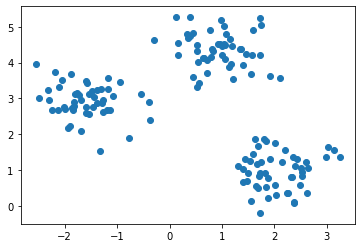

In [1]:
# make dataset
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, # 从三类中抽取
                  cluster_std=0.5, 
                  random_state=0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:,0],X[:,1],marker='o')
plt.show()

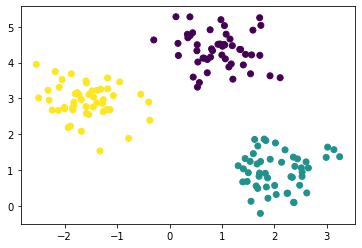

In [2]:
# 使用 sklearn 中 KMeans 来聚类
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,  # k 是需要自己设定的, 错误的 k 可能结果就不对
            init='random',
            n_init=10,  # 重复运行算法 10 次，选其中最好的聚类模型，避免不好的初始化值带来的影响
            max_iter=300,
            random_state=0)

y_km = km.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_km)
plt.show()

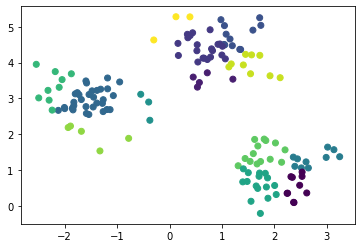

In [3]:
from sklearn.cluster import Birch
y_pred = Birch(n_clusters = None).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

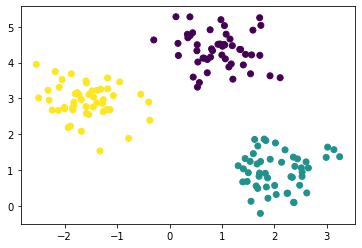

In [4]:
y_pred = Birch(n_clusters = 3).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

## Using the elbow method to find the optimal number of clusters

In [5]:
#判断聚类效果可用 within-cluster SSE (Distortion)，这个可由 KMeans() 中的 inertia_ 属性获得
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


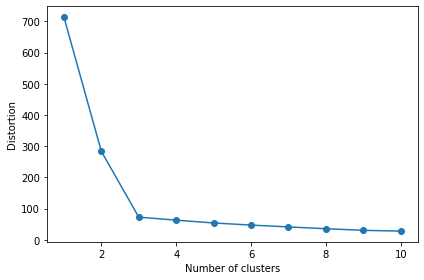

In [6]:
# elbow method 方法就是需要找出当 distortion 变化非常快时的 k 值，也即找拐点
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions , marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()

# hierarchical tree

In [7]:
# 生成数据
import pandas as pd
import numpy as np

np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels = ['ID_0','ID_1','ID_2','ID_3','ID_4']

X = np.random.random_sample([5,3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


## Applying agglomerative clustering via scikit-learn

In [8]:
#用 sklearn 来聚类
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0]


# DBSCAN

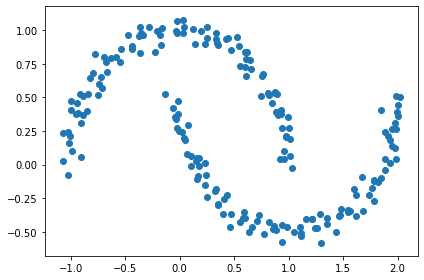

In [9]:
# 生成半月形数据
# two visible, half-moon-shaped groups consisting of 100 sample points each
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:,0], X[:,1])
plt.tight_layout()

K-means and hierarchical clustering:

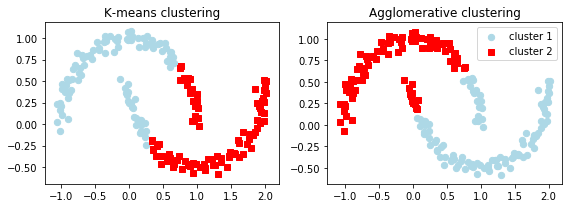

In [10]:
# complete linkage clustering
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km==0,0], X[y_km==0,1], c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km==1,0], X[y_km==1,1], c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0,0], X[y_ac==0,1], c='lightblue', marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac==1,0], X[y_ac==1,1], c='red', marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()

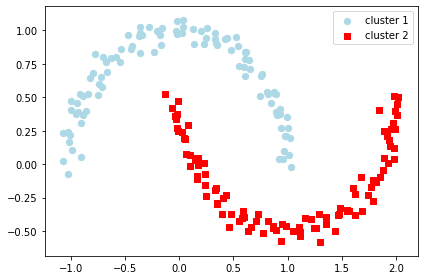

In [11]:
# DBSCAN
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db==0,0], X[y_db==0,1], c='lightblue', marker='o', s=40, label='cluster 1')
plt.scatter(X[y_db==1,0], X[y_db==1,1], c='red', marker='s', s=40, label='cluster 2')
plt.legend()
plt.tight_layout()

圆环图形

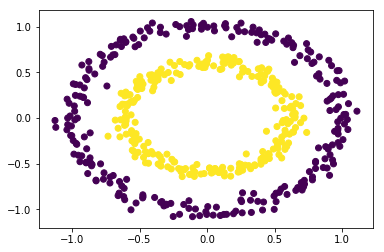

In [18]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=500, 
                    factor=.6, 
                    noise=.05)

plt.scatter(X[:, 0], X[:, 1], c=y);

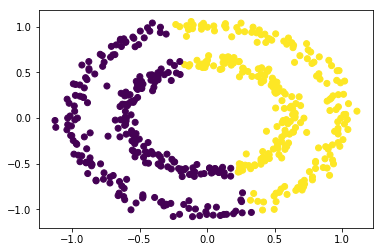

In [19]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
predict = km.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=predict);

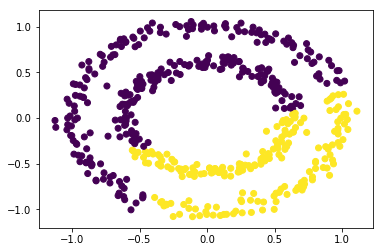

In [20]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering()
predict = ac.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=predict);

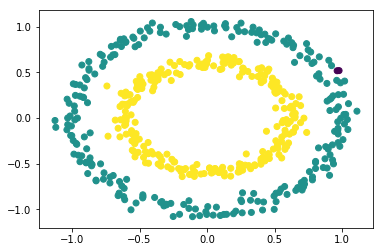

In [21]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.15,
            min_samples=9,
            metric='euclidean')
predict = db.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=predict);